In [1]:
import lireDonnees
from classifieurs.modele_probabiliste import *
from tests import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings 
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('data/train.csv')
train = train.drop("id",axis=1)

test = pd.read_csv('data/test.csv')

le = LabelEncoder()
le.fit(train.species)

y = train.pop("species")
y = le.transform(y)

X = train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True, stratify=y)


scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
f1_no_parameters = []
f1_parameters = []
models = []

In [4]:
models.append('GaussianNB')

gaussian_classifier = GaussianNB_Classifier()
gaussian_classifier.train(X_train,y_train)

y_pred = gaussian_classifier.predict(X_test)
score = gaussian_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.6111111111111112}


Fitting 5 folds for each of 100 candidates, totalling 500 fits


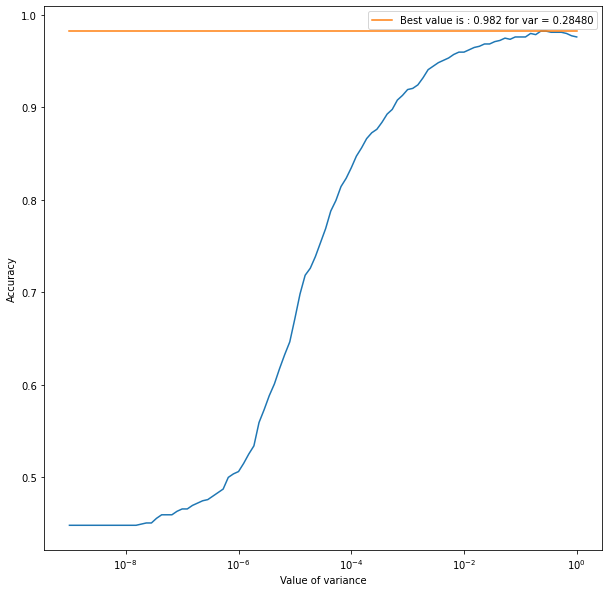

{'var_smoothing': 0.2848035868435802}


In [5]:
# create an instance of the GaussianNBClassifier class with a dictionary of hyperparameters to search over
gaussian_classifier = GaussianNB_Classifier({'var_smoothing': np.logspace(0, -9, num=100)})

# find the best hyperparameters for the classifier
gaussian_best_params = gaussian_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(gaussian_best_params)

In [6]:
gaussian_classifier = GaussianNB_Classifier()
gaussian_classifier.setParameter(gaussian_best_params)

gaussian_classifier.train(X_train,y_train)

y_pred = gaussian_classifier.predict(X_test)

score = gaussian_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9747474747474747}


In [7]:
models.append('LogisticRegression')

logistic_classifier = LogisticRegression_Classifier()
logistic_classifier.train(X_train,y_train)

y_pred = logistic_classifier.predict(X_test)
score = logistic_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.98989898989899}


Fitting 5 folds for each of 7 candidates, totalling 35 fits


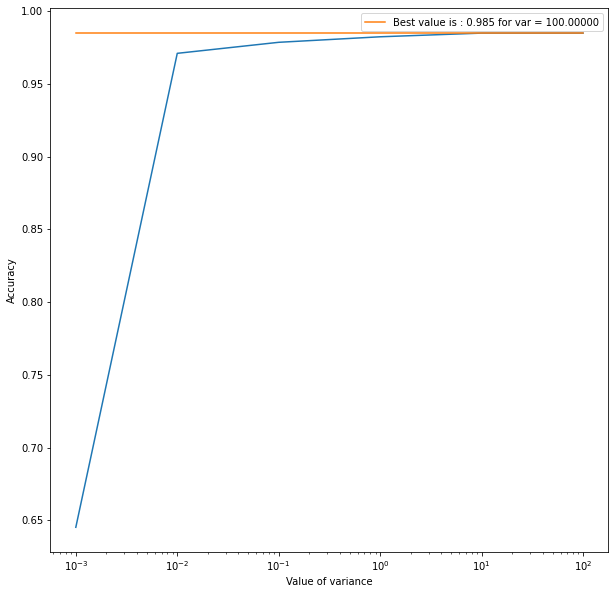

{'C': 100}


In [8]:
# create an instance of the LogisticRegressionClassifier class with a dictionary of hyperparameters to search over
logistic_classifier = LogisticRegression_Classifier({"C":[100,50, 10, 1.0, 0.1, 0.01,0.001]})

# find the best hyperparameters for the classifier
logistic_best_params = logistic_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(logistic_best_params)

In [9]:
logistic_classifier = LogisticRegression_Classifier()
logistic_classifier.setParameter(logistic_best_params)

logistic_classifier.train(X_train,y_train)

y_pred = logistic_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
score = logistic_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.98989898989899}


In [10]:
models.append('SVM')

svm_classifier = SVM_Classifier()
svm_classifier.train(X_train,y_train)

y_pred = svm_classifier.predict(X_test)
score = svm_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.9696969696969697}


Fitting 5 folds for each of 9 candidates, totalling 45 fits


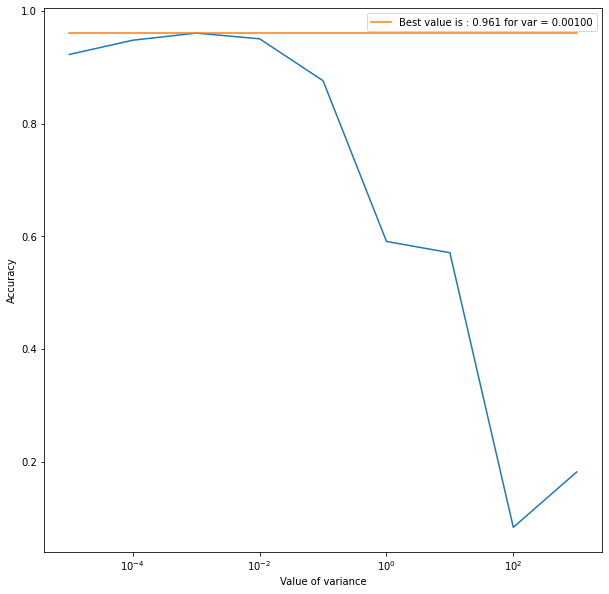

{'alpha': 0.001}


In [11]:
# create an instance of the LogisticRegressionClassifier class with a dictionary of hyperparameters to search over
svm_classifier = SVM_Classifier({"alpha":[1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]})

# find the best hyperparameters for the classifier
svm_best_params = svm_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(svm_best_params)

In [12]:
svm_classifier = SVM_Classifier()
svm_classifier.setParameter(svm_best_params)

svm_classifier.train(X_train,y_train)

y_pred = svm_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
score = svm_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9545454545454546}


In [13]:
models.append('Perceptron')

perceptron_classifier = Perceptron_Classifier()
perceptron_classifier.train(X_train,y_train)

y_pred = perceptron_classifier.predict(X_test)
score = perceptron_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.9494949494949495}


Fitting 5 folds for each of 9 candidates, totalling 45 fits


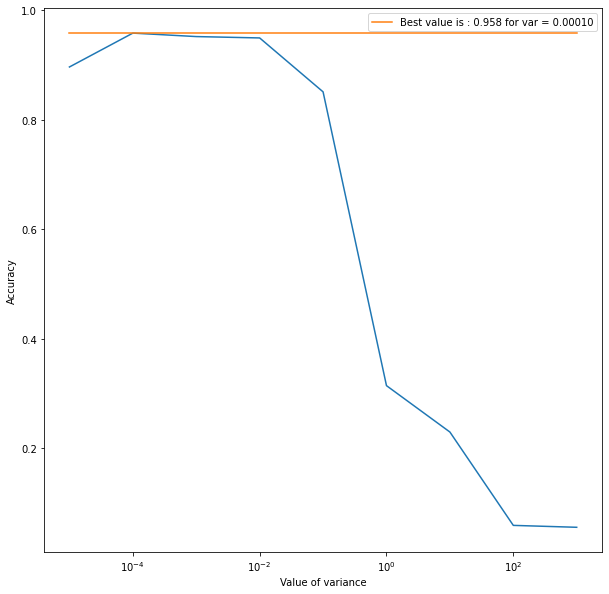

{'alpha': 0.0001}


In [14]:
# create an instance of the LogisticRegressionClassifier class with a dictionary of hyperparameters to search over
perceptron_classifier = Perceptron_Classifier({"alpha":[1e-5,1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]})

# find the best hyperparameters for the classifier
perceptron_best_params = perceptron_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(perceptron_best_params)

In [15]:
perceptron_classifier = Perceptron_Classifier()
perceptron_classifier.setParameter(perceptron_best_params)

perceptron_classifier.train(X_train,y_train)

y_pred = perceptron_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
score = perceptron_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9595959595959596}


In [16]:
models.append('Random Forest')

rdforest_classifier = RandomForest_Classifier()
rdforest_classifier.train(X_train,y_train)

y_pred = rdforest_classifier.predict(X_test)
score = rdforest_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.9848484848484849}


Fitting 5 folds for each of 7 candidates, totalling 35 fits


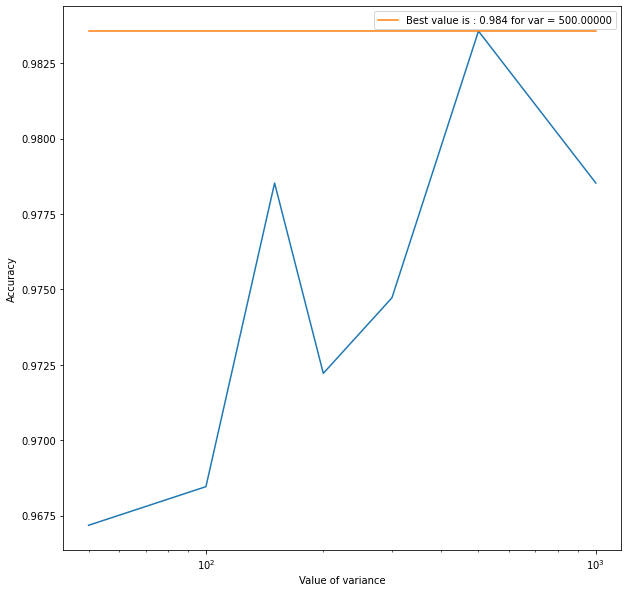

{'n_estimators': 500}


In [17]:
# create an instance of the LogisticRegressionClassifier class with a dictionary of hyperparameters to search over
rdforest_classifier = RandomForest_Classifier({"n_estimators":[50,100,150,200,300,500,1000]})

# find the best hyperparameters for the classifier
rdforest_best_params = rdforest_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(rdforest_best_params)

In [18]:
rdforest_classifier = RandomForest_Classifier()
rdforest_classifier.setParameter(rdforest_best_params)

rdforest_classifier.train(X_train,y_train)

y_pred = rdforest_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
score = rdforest_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9848484848484849}


In [19]:
models.append('KNN')

knn_classifier = KNN_Classifier()
knn_classifier.train(X_train,y_train)

y_pred = knn_classifier.predict(X_test)
score = knn_classifier.error(y_pred,y_test)

f1_no_parameters.append(score['f1-score'])
print(score)

{'f1-score': 0.9646464646464646}


Fitting 5 folds for each of 7 candidates, totalling 35 fits


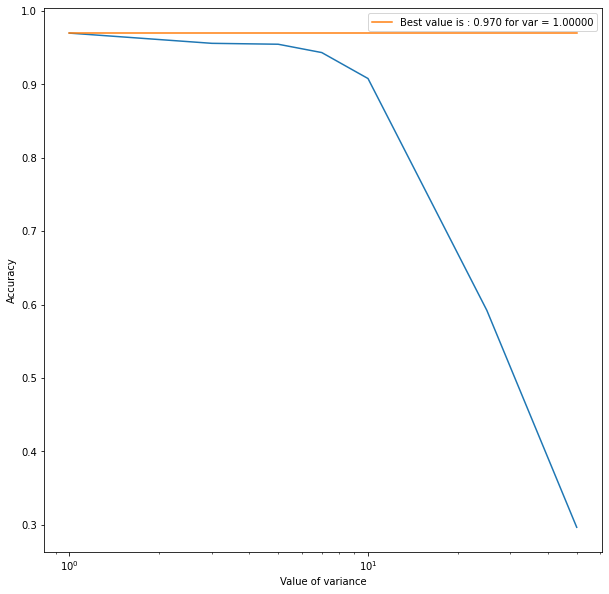

{'n_neighbors': 1}


In [20]:
# create an instance of the LogisticRegressionClassifier class with a dictionary of hyperparameters to search over
knn_classifier = KNN_Classifier({"n_neighbors":[1,3,5,7,10,25,50]})

# find the best hyperparameters for the classifier
knn_best_params = knn_classifier.hyperparameter_search(X_train, y_train, k=5,graphic=True)
print(knn_best_params)

In [21]:
knn_classifier = KNN_Classifier()
knn_classifier.setParameter(knn_best_params)

knn_classifier.train(X_train,y_train)

y_pred = knn_classifier.predict(X_test)

# use the LabelEncoder object to transform your data
score = knn_classifier.error(y_pred,y_test)
f1_parameters.append(score['f1-score'])

print(score)

{'f1-score': 0.9797979797979798}


In [22]:
result = pd.DataFrame(data = {'models':models,'f1 score':f1_no_parameters,'f1 score hyperparameters':f1_parameters})
result

,models,f1 score,f1 score hyperparameters
0,GaussianNB,0.611111,0.974747
1,LogisticRegression,0.989899,0.989899
2,SVM,0.969697,0.954545
3,Perceptron,0.949495,0.959596
4,Random Forest,0.984848,0.984848
5,KNN,0.964646,0.979798


In [24]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='No Hyperparameters', x=result.models, y=result['f1 score']),
    go.Bar(name='Hyperparameters', x=result.models, y=result['f1 score hyperparameters'])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()